Реализация проекта в сфере DS

Загрузка библиотек и чтение файла

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("dataset.csv")

Мы будем пользоваться следующими библиотеками:

Pandas,Numpy - для чтения и обработки данных

Matplotlib,seaborn - для визуализации

Skit-learn - для обучения моделей, получения выводов

Для начала мы прочитаем,наш датасет


Первичный анализ данных

In [ ]:

print("Первые строки данных:")
print(data.head())

print("\nОбщая информация о данных:")
print(data.info())

print("\nПроверка на пропущенные значения:")
print(data.isnull().sum())

print("\nСтатистическое описание числовых данных:")
print(data.describe())




Первые строки данных:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57     

При выполении превичного анализа данных мы сделали:

Вывели первые строки данных

Получили общую информацию о данных

Проверили данные на пропущенные значения

Статистически описали числовые данные

Обработка пропущенных значений и выбросов

In [ ]:
print("\nПропущенные значения перед обработкой:")
print(data.isnull().sum())


data.fillna(data.median(numeric_only=True), inplace=True)


data.fillna(0, inplace=True)  


print("\nПропущенные значения после обработки:")
print(data.isnull().sum())


data['explicit'] = data['explicit'].astype(int)
data = pd.get_dummies(data, columns=['track_genre'], drop_first=True)


data['loudness_log'] = np.log1p(-data['loudness'].clip(upper=0))


data['duration_min'] = data['duration_ms'] / 60000


data.drop(['track_id', 'artists', 'album_name', 'track_name', 'duration_ms'], axis=1, inplace=True)

data = data.drop(columns=["Unnamed: 0"], errors="ignore")




Пропущенные значения перед обработкой:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Пропущенные значения после обработки:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_

На данном этапе мы сделали:

Обработку пропущенных значений

Заполнили пропуски медианными значениями для числовых данных

Оставшиеся пропуски заполнили нулями

Создали дополнительные признаки

Удалили ненужные признаки

EDA (
Разведочный анализ данных)

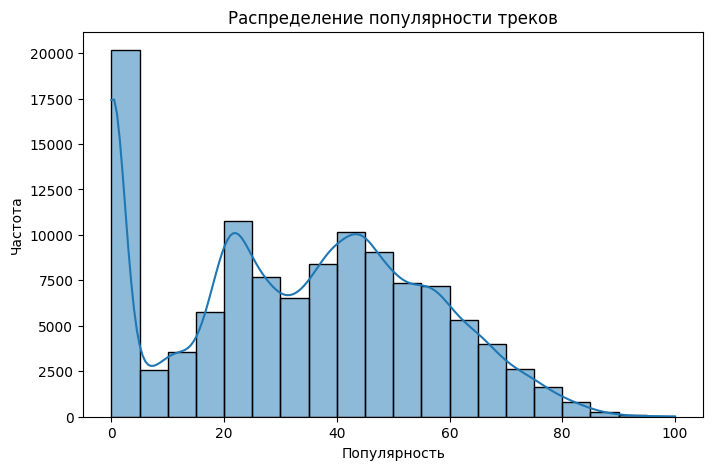

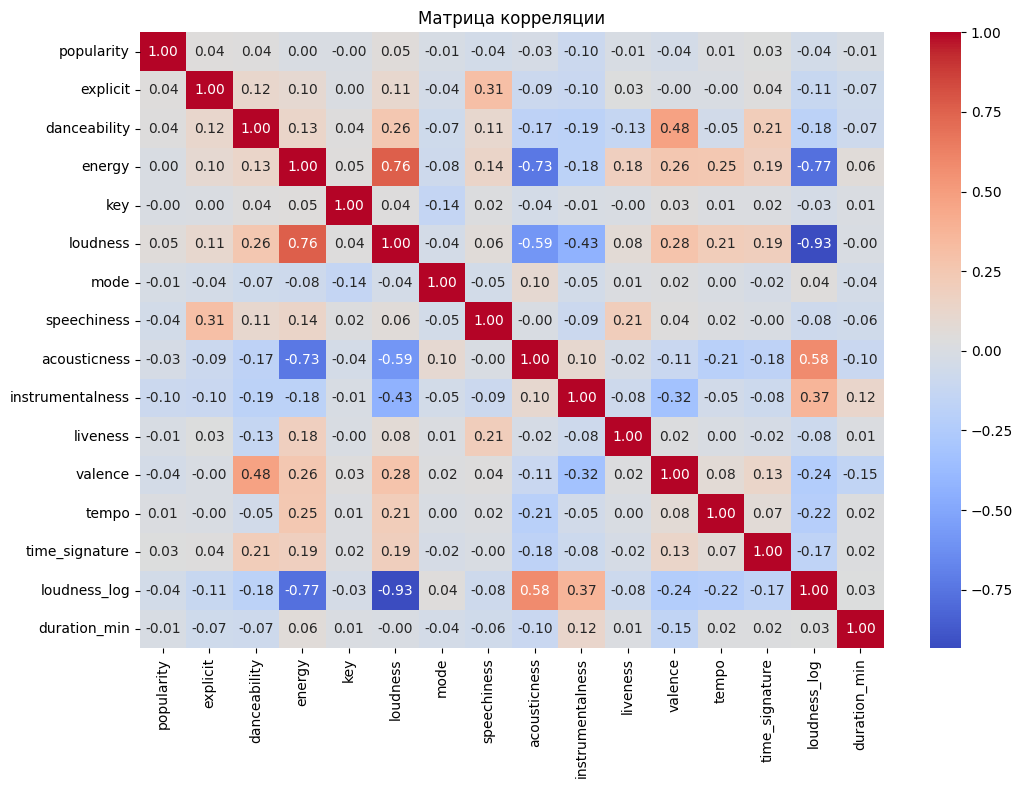

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['popularity'], bins=20, kde=True)
plt.title("Распределение популярности треков")
plt.xlabel("Популярность")
plt.ylabel("Частота")
plt.show()

numerical_data = data.select_dtypes(include=[np.number])  # Только числовые данные
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Матрица корреляции")
plt.show()

При проведении
Разведочного анализа данных мы сделали Визуализацию распредения целевой переменной и
Матрицу корреляции

На основе полученных данных мы провели анализ и сделали выводы для установления более эффективных результатов

Feature Engineering

In [6]:
X = data.drop(columns=['popularity'])
y = data['popularity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


if np.any(np.isnan(X_scaled)):
    print("Обнаружены пропущенные значения после масштабирования. Исправляем...")
    X_scaled = np.nan_to_num(X_scaled)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Во время прохождения этого этапа мы выделили признаки таргета,масшатибровали данные, сделали проверку на пропущенные значения и разделлил данные на тренировочную и тестовую выборки

Обучение моделей

In [7]:

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, random_state=42),
    "MLP model" : MLPRegressor(random_state=42, max_iter=50),
}


results = {}
for name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name}: MSE={mse:.2f}, R2={r2:.2f}")


results_df = pd.DataFrame(results).T
print("\nРезультаты моделей:")
print(results_df)


Linear Regression: MSE=368.09, R2=0.26
Ridge: MSE=368.09, R2=0.26
Lasso: MSE=431.79, R2=0.13
Random Forest: MSE=45.89, R2=0.91
Gradient Boosting: MSE=425.54, R2=0.14
MLP model: MSE=317.35, R2=0.36

Результаты моделей:
                          MSE        R2
Linear Regression  368.092742  0.260133
Ridge              368.092743  0.260133
Lasso              431.788040  0.132106
Random Forest       45.891180  0.907759
Gradient Boosting  425.536529  0.144671
MLP model          317.350259  0.362126


c:\Users\avanp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest показала лучшие результаты

Визуальное сравнение MSE и R2

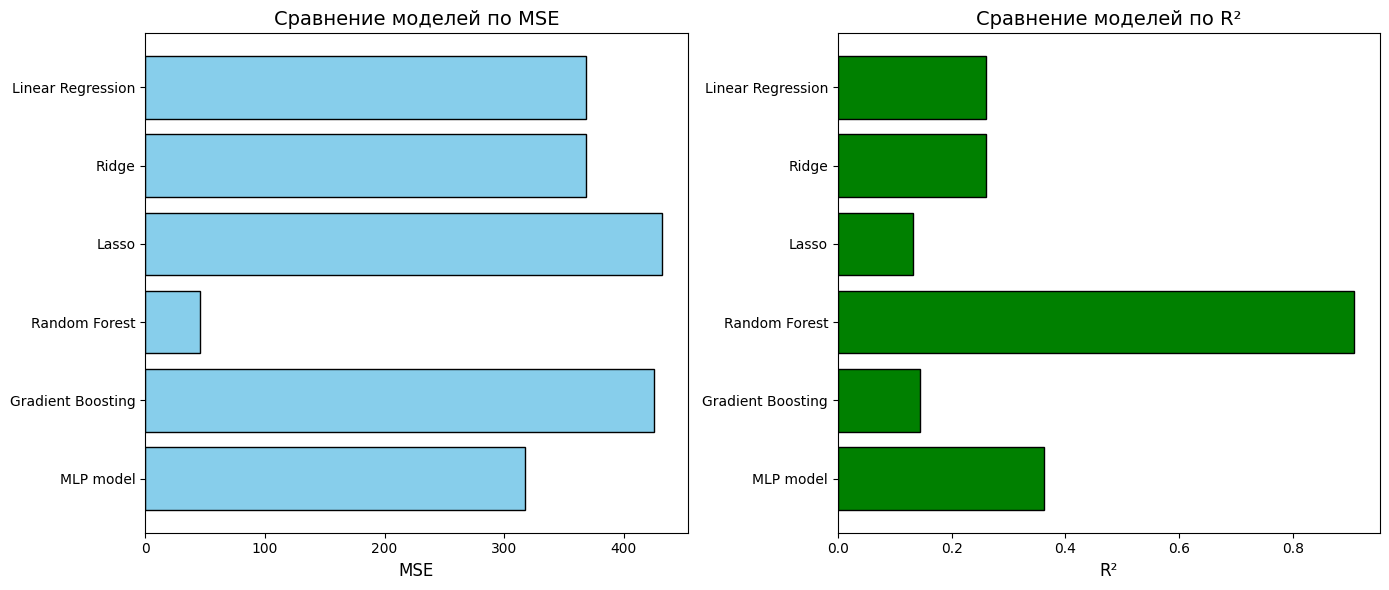

In [9]:
import matplotlib.pyplot as plt
import numpy as np




fig, ax = plt.subplots(1, 2, figsize=(14, 6))


ax[0].barh(results_df.index, results_df['MSE'], color='skyblue', edgecolor='black')
ax[0].set_title('Сравнение моделей по MSE', fontsize=14)
ax[0].set_xlabel('MSE', fontsize=12)
ax[0].invert_yaxis()


colors = ["green" if r2 > 0 else "red" for r2 in results_df['R2']]
ax[1].barh(results_df.index, results_df['R2'], color=colors, edgecolor='black')
ax[1].set_title('Сравнение моделей по R²', fontsize=14)
ax[1].set_xlabel('R²', fontsize=12)
ax[1].invert_yaxis()


plt.tight_layout()
plt.show()

График Actual and Predicted на основе Random Forest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50

building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   21.7s


building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   48.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.3s finished


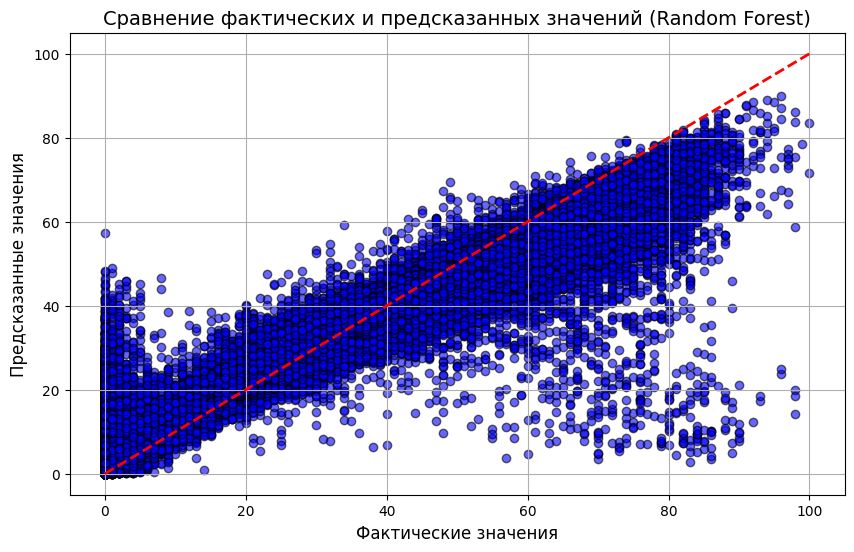

MSE: 45.89
R²: 0.91


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


best_model = RandomForestRegressor(n_estimators=50, random_state=42,n_jobs=-1, verbose=2)
best_model.fit(X_scaled, y)

y_pred = best_model.predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  
plt.title('Сравнение фактических и предсказанных значений (Random Forest)', fontsize=14)
plt.xlabel('Фактические значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.grid(True)
plt.show()


mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

На графике мы видим,что модель достаточно хорошо справляется с предсказанием

Мы обучили модели из следующих семейств: Линейные,деревья,модификации градиентного бустинга,нейронные сети,но нас не устроили некоторые результаты поэтому,мы решили улучшить параметры для некоторых из них 

Улучшеннные параметры для Линейных

In [8]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
print("Лучшие параметры для Ridge:", ridge_grid.best_params_)

# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)
print("Лучшие параметры для Lasso:", lasso_grid.best_params_)

# Оценка Ridge
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
print("Ridge - MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge - R²:", r2_score(y_test, y_pred_ridge))

# Оценка Lasso
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
print("Lasso - MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso - R²:", r2_score(y_test, y_pred_lasso))


Лучшие параметры для Ridge: {'alpha': 10}
Лучшие параметры для Lasso: {'alpha': 0.01}
Ridge - MSE: 365.5120091974698
Ridge - R²: 0.2593188102977091
Lasso - MSE: 365.69267485871245
Lasso - R²: 0.2589527056184091


В результате улучшения получилось снизить количество MSE для Lasso на 70 и для Ridge на 8,R2 при этом увеличилось почти 2 раза

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt_params = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='r2')
dt_grid.fit(X_train, y_train)
print("Лучшие параметры для Decision Tree:", dt_grid.best_params_)

# Оценка Decision Tree
best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)
print("Decision Tree - MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree - R²:", r2_score(y_test, y_pred_dt))


Лучшие параметры для Decision Tree: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Decision Tree - MSE: 351.9524257340482
Decision Tree - R²: 0.2867962341821011


Для Decision Tree в результате улучшения настройки модели результаты тоже выросли,но незначительно

Отбор лучших параметров для Random Forest

Важность признаков:
                      Feature  Importance
0            instrumentalness    0.300055
5         track_genre_iranian    0.122883
9         track_genre_romance    0.116508
8        track_genre_pop-film    0.082682
7           track_genre_latin    0.081400
6           track_genre_k-pop    0.068197
4  track_genre_detroit-techno    0.064387
1   track_genre_chicago-house    0.059418
3       track_genre_classical    0.056189
2           track_genre_chill    0.048281


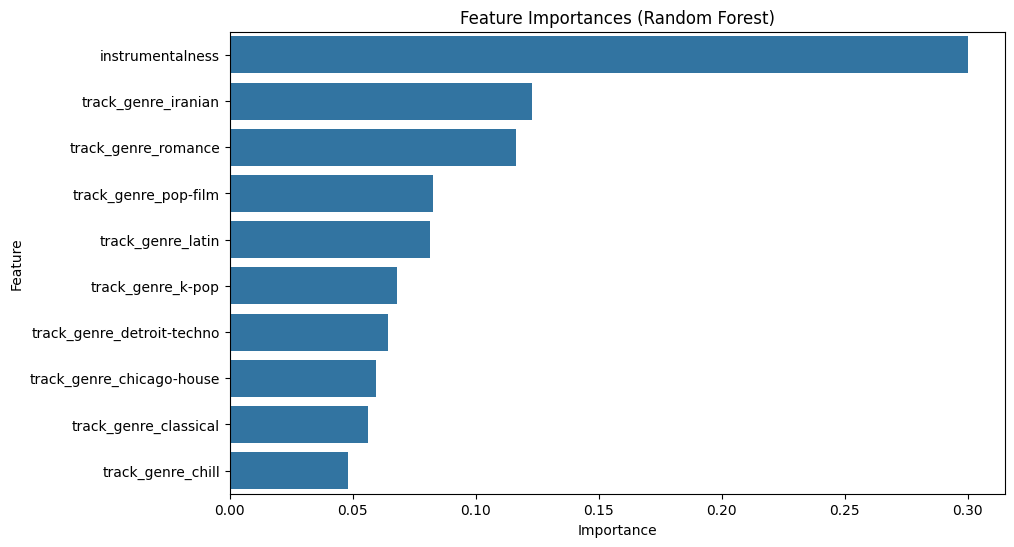

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler


# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Отбор 10 лучших признаков
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]

# Обучение Random Forest
best_rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
best_rf.fit(X_selected, y)

# Важность признаков
importances = best_rf.feature_importances_

# Создаем DataFrame с важностью признаков
importances_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Вывод важности признаков
print("Важность признаков:")
print(importances_df)

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances (Random Forest)')
plt.show()


Вывели параметры которые сильнее всего влияют на модель Random Forest,таким образом мы смодем улучшить результаты исследования

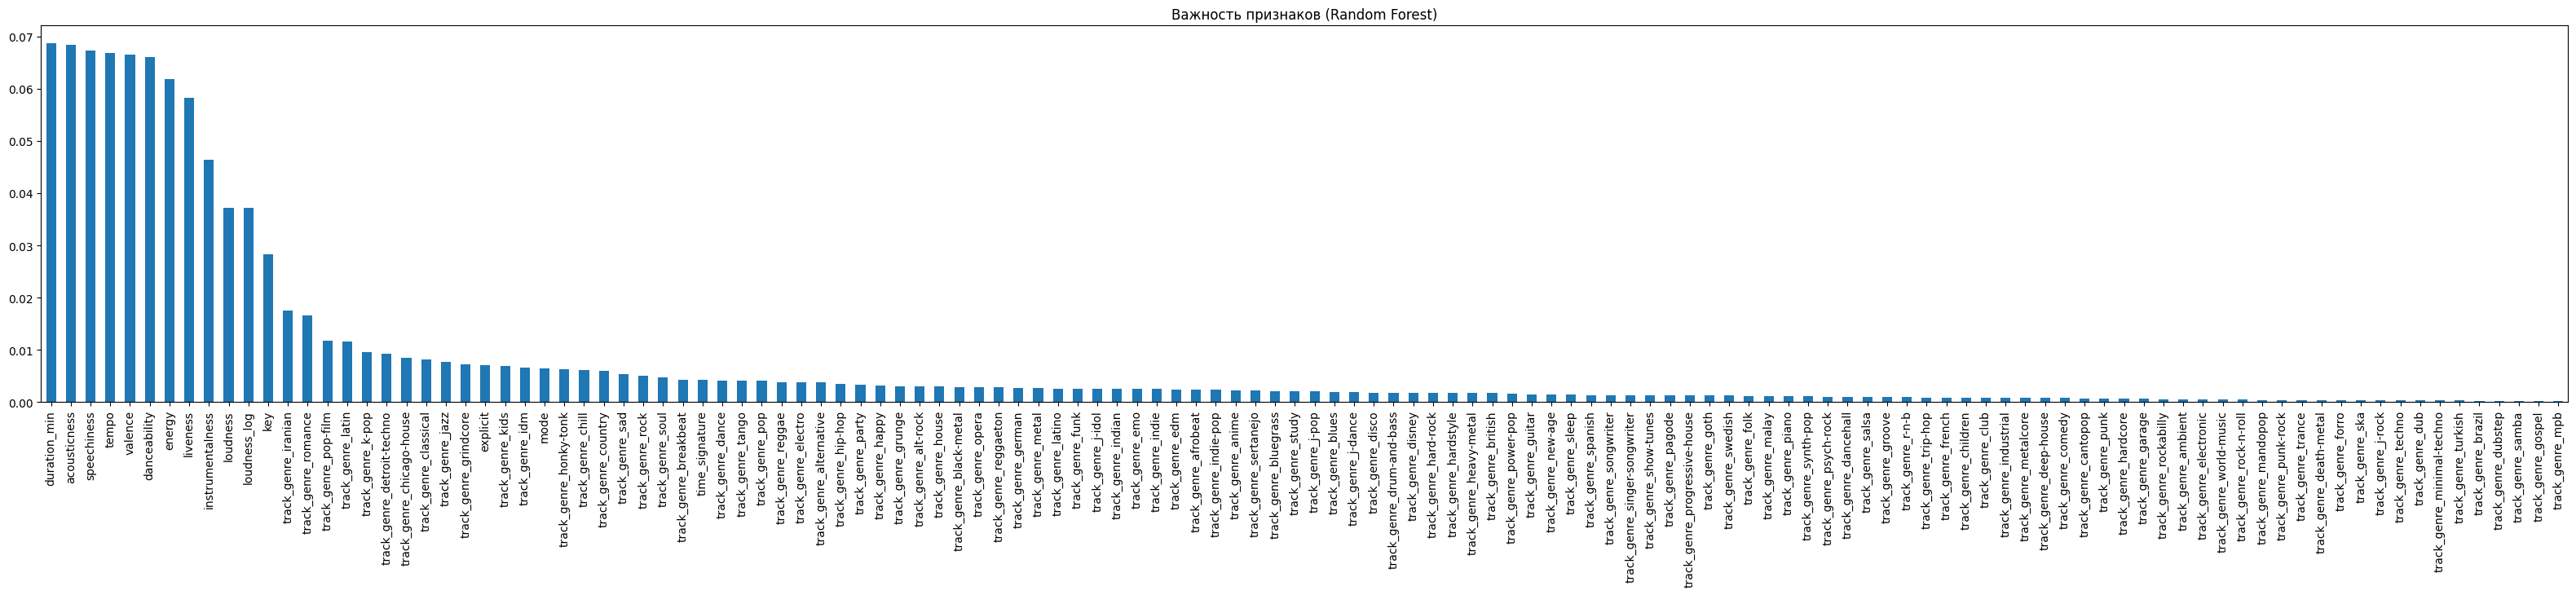

In [ ]:
# Визуализация важности признаков для Random Forest
rf = models["Random Forest"]
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(40, 6), title="Важность признаков (Random Forest)")
plt.show()


Кросс-валидация для лучшей модели (Random Forest)

In [ ]:
from sklearn.model_selection import cross_val_score

best_model = RandomForestRegressor(n_estimators=50,random_state=42)

cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='r2')
print("\nСредний R² на кросс-валидации:", np.mean(cv_scores))

best_model.fit(X_scaled, y)
print("\nМодель готова к использованию!")



Средний R² на кросс-валидации: 0.12540622984225608

Модель готова к использованию!


В результате данного исследования мы использовали разные подоходы к получению желаемого результата,провели EDA,а именно корреляцию колонок с таргетом и матрицу корреляции,далее мы провели Feature Engineering,выделили признаки таргета,масшатабировали данные и проверяли наа пропущенные значения, обучили модели из каждого семейства: Линейные, деревья, модификации градиентного бустинга , нейронные сети после чего провели улучшение некоторых моделей и на лучшей модели сделали кросс-валидацию в 5 фолдов

В итоге мы выявили,что с данной задачей лучше всех справляется модель Random Forest со следующими показателями R2 = 0.91 MSE = 45 и даже после кросс-валидации она показала хорошие значение